In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
df = pd.read_csv("homeprices.csv")
print(df)

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


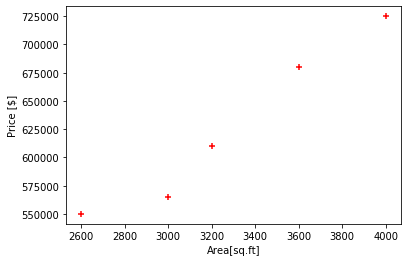

In [14]:
%matplotlib inline
plt.xlabel("Area[sq.ft]")
plt.ylabel("Price [$]")
plt.scatter(df.area,df.price, color='red', marker='+')

# Linear Regression model
 - First train the model, this is done by the function fit.
 - The fit function expects a 2d Array, hence the df[['area']] and a 1D array hence df.price or df['price'].
    

In [29]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Next predict results with the trained model
 - This is done with the function predict, which also takes a 2D array

In [33]:
reg.predict([[3300]])

array([628715.75342466])

### Internally the model calulated the coeff 'm' and intercept 'c' y = mx+c

In [37]:
c = reg.intercept_
m = reg.coef_
print(c, m)

180616.43835616432 [135.78767123]


### Lets see how the fitted line looks like

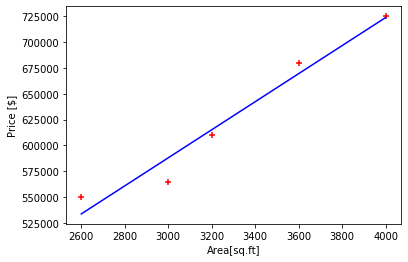

In [41]:
%matplotlib inline
plt.xlabel("Area[sq.ft]")
plt.ylabel("Price [$]")
plt.scatter(df.area,df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

## Now trying to predict the prices of respective areas from a file

In [42]:
d = pd.read_csv("areas.csv")

In [45]:
price = reg.predict(d)

### Add new column to the data frame 'price' and write the predicted values to this file

In [46]:
d['price'] = price

### Write the dataframe to a prediction.csv file

In [49]:
d.to_csv("prediction.csv", index=False)